# 0. T_Introduction to Facebook Prophet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

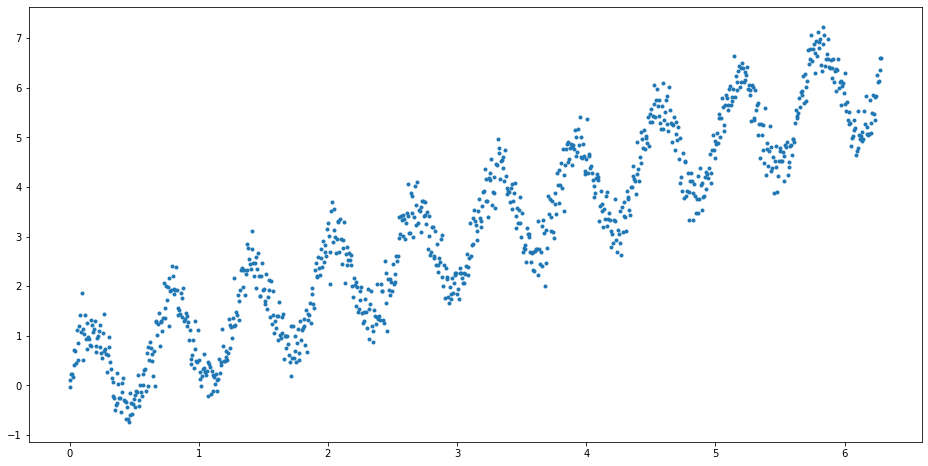

In [2]:
# process data and save it as signal.csv

fig = plt.figure(figsize = (16,8))
t = np.linspace(0,2*np.pi,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = np.sin(t*10) + t
y = y + np.random.normal(0, 0.3, 1000)

plt.plot(t,y,'.')


df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

df.to_csv('Data/sine.csv')

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


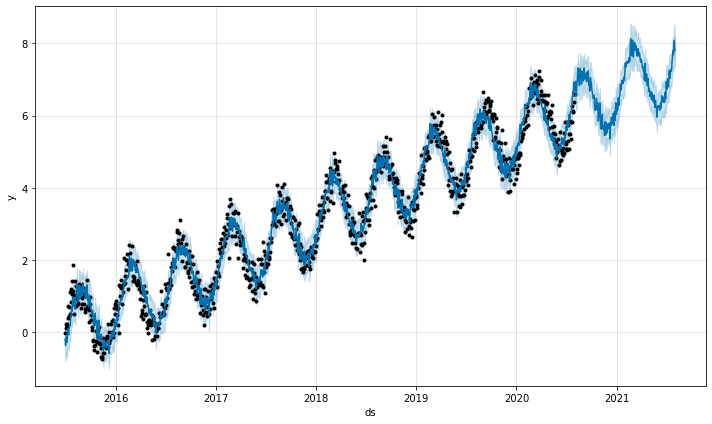

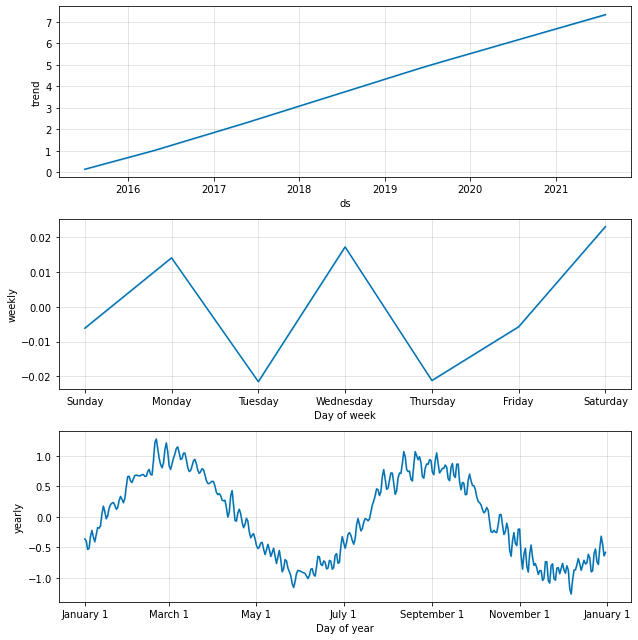

In [3]:
# testing

df = df.sample(frac=1)

m = Prophet(seasonality_prior_scale = 10).add_seasonality(name='yearly',
                                    period=365.25,
                                    fourier_order=100,
                                    prior_scale=0.01,
                                    mode='additive')

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)

fig1 = m.plot_components(forecast)



In [4]:
# grab the individual data from plot components

for trend in lines.get_axes():
    x,y = trend.lines[0].get_data()
    plt.plot(x,y)
    plt.show()


NameError: name 'lines' is not defined

In [ ]:
lines = m.plot_components(forecast)

# Trend Values
trend = lines.get_axes()[0]
trend.lines[0].get_data()

In [ ]:
fig = plt.figure(figsize = (16,8))
t = np.linspace(0,2*np.pi,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = np.sin(t*10) + t
y = y + np.random.normal(0, [i/1200 for i in range(300,1300)], 1000)

plt.plot(t,y,'.')

df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

df.to_csv('Data/sine_multiplicative.csv')

In [ ]:
# testing

df = df.sample(frac=1)

m = Prophet()

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)

In [ ]:
# testing

df = df.sample(frac=1)

m = Prophet(seasonality_mode = 'multiplicative')

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)



In [ ]:
'https://pageviews.toolforge.org/?project=en.wikipedia.org&pages={{FULLPAGENAMEE}}'

# Creating dataset for passengers

In [ ]:
path = 'Data/Teaching/airline-passengers.csv'
df = pd.read_csv(path)
df.columns = ['ds','y']
df.to_csv('Data/passengers.csv')
df.head()

# Creating holiday data

In [ ]:
t = np.linspace(0,10,1000)

start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 1000)
y = -t
y = y + np.random.normal(0, 0.3, 1000)

plt.plot(t,y,'.')


df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

m = Prophet()
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)

In [ ]:
eid_fitr = ['2015-07-17','2016-07-06','2017-06-25','2018-06-15','2019-06-05','2020-05-24']
eid_adha = ['2015-09-24','2016-09-10','2017-08-31','2018-08-22','2019-08-12','2020-07-31']

In [ ]:
eid_fitr_tf = []
for item in eid_fitr:
    eid_fitr_tf = []
    for time in df.ds:
        if item in time:
            print(True)
            eid_fitr_tf.append(True)
        else:
            eid_fitr_tf.append(False)

    df.y[eid_fitr_tf] = df.y[eid_fitr_tf] + 0.5
    

plt.plot(df.index,df.y,'.')


In [ ]:


eid_fitr_tf = []
for item in eid_adha:
    eid_fitr_tf = []
    for time in df.ds:
        if item in time:
            print(True)
            eid_fitr_tf.append(True)
        else:
            eid_fitr_tf.append(False)

    df.y[eid_fitr_tf] = df.y[eid_fitr_tf] + 0.5
    

plt.plot(df.index,df.y,'.')



In [ ]:
print(eid_adha)
eid1 = pd.DataFrame({
  'holiday': 'eid_adha',
  'ds': pd.to_datetime(eid_adha),
  'lower_window': 0,
  'upper_window': 0,
})

eid2 = pd.DataFrame({
  'holiday': 'eid_fitr',
  'ds': pd.to_datetime(eid_fitr),
  'lower_window': 0,
  'upper_window': 0,
})

holidays = pd.concat((eid1, eid2))

#holidays['prior_scale'] = 10000

m = Prophet(holidays = holidays, holidays_prior_scale= 10000)
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)
holidays

In [ ]:
print(eid_adha)
eid1 = pd.DataFrame({
  'holiday': 'eid_adha',
  'ds': pd.to_datetime(eid_adha),
  'lower_window': 0,
  'upper_window': 0,
})

eid2 = pd.DataFrame({
  'holiday': 'eid_fitr',
  'ds': pd.to_datetime(eid_fitr),
  'lower_window': 0,
  'upper_window': 0,
})

holidays = pd.concat((eid1, eid2))

#holidays['prior_scale'] = 10000

m = Prophet(holidays = holidays, holidays_prior_scale= 0.1)
forecast = m.fit(df).predict(df)
fig = m.plot(forecast)
holidays

In [6]:
df = pd.read_csv('Data/online.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


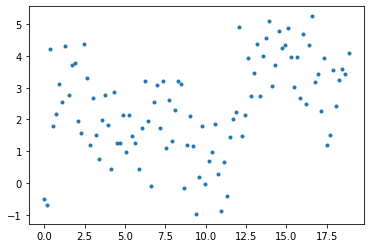

In [47]:
t = np.linspace(0,6*np.pi,101)

y = np.sin(t) + np.sin(t/2) + np.sin(1/np.pi) + np.power(t,2)/200
y = y + np.random.normal(1,0.3,101) + np.random.normal(0.3, 1,101) 

plt.plot(t,y,'.')



In [48]:
start = pd.Timestamp('2015-07-01')
end = pd.Timestamp('2020-08-01')

datetime = np.linspace(start.value, end.value, 101)
df = pd.DataFrame(data = {'ds':dict(timestamp=pd.to_datetime(datetime))['timestamp']})
df.ds = df.ds.dt.strftime('%Y-%m-%d %H:%M:%S')
df['y'] = y

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


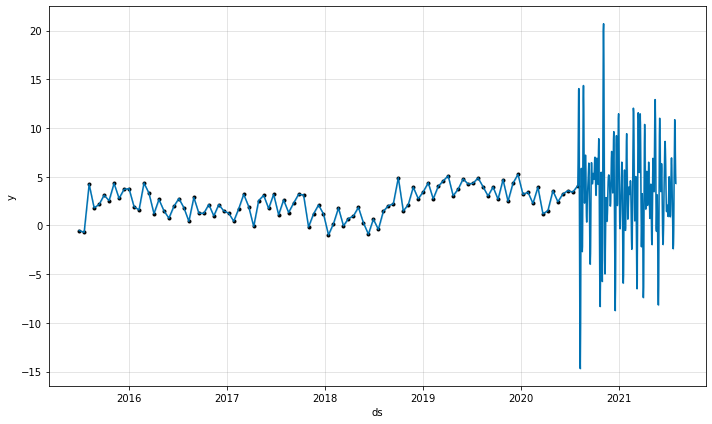

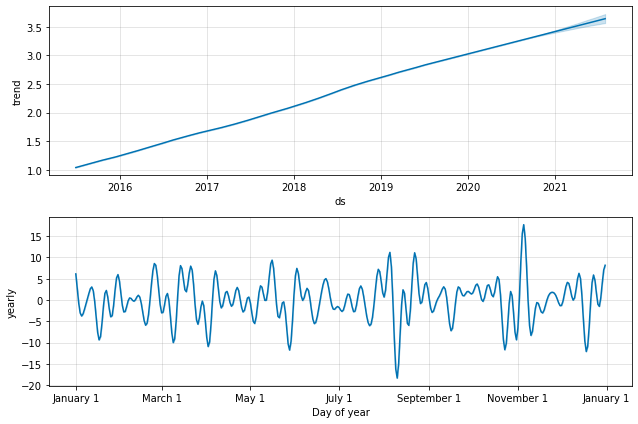

In [55]:
df = df.sample(frac=1)

m = Prophet(seasonality_prior_scale = 10).add_seasonality(name='yearly',
                                    period=365.25,
                                    fourier_order=50,
                                    prior_scale=10,
                                    mode='additive')

m.fit(df)

future = m.make_future_dataframe(periods = 365)

forecast = m.predict(future)

fig1 = m.plot(forecast)

fig1 = m.plot_components(forecast)